In [2]:
import numpy as np
import pandas as pd

class Node:
  def __init__(self,name,condition):
    self.name = name
    self.condition = condition
    self.children = []
  
  def getId(self):
    return str(self.name) + " " + str(self.condition) + " "

class DecisionTree:
  def __init__(self,dataset,target_class):
    self.dataset = dataset
    self.root = Node("Root ","has no condition")
    self.target_class = target_class
    self.max_gain_classes = []
    self.rules=[]
  
  def get_entropy(self,column_name,dataset,p,n):
    values_dict = dataset[column_name].unique()
    entropy = 0
    for key in list(values_dict):
      df = dataset[dataset[column_name]==key]
      p_df,n_df,IG = self.get_info_gain(list(df[self.target_class]))
      entropy+=((p_df + n_df)/(p+n))*IG
    
    return entropy
  
  def get_info_gain(self,column):
    categories = {}
    for item in column:
      categories[item] = 1 if item not in categories else categories[item] + 1
    p = categories["Yes"] if "Yes" in categories else 0 
    n = categories["No"] if "No" in categories else 0
    p_ratio = p/(p+n)
    n_ratio = n/(p+n)
    if(p_ratio==0):
      return p,n,-(n_ratio*np.log2(n_ratio))
    if(n_ratio==0):
      return p,n,-(p_ratio*np.log2(p_ratio))
    return p,n,-((p_ratio*np.log2(p_ratio)) + (n_ratio*np.log2(n_ratio)))
  
  def build_tree(self):
    self.root = self.build(self.dataset,None)

  def build(self,dataset,root):
    if root is None:
      root = self.root
    p,n,ig_target = self.get_info_gain(list(dataset[self.target_class]))
    if(ig_target==0):
      root.children.append(Node(self.target_class,"Yes" if n==0 else "No"))
      return root
    
    max_gain_class_index=0
    max_gain = 0
    columns = dataset.columns
    for index in range(0,len(columns)):
      if columns[index] == self.target_class:
        continue
      entropy = self.get_entropy(columns[index],dataset,p,n)
      gain = ig_target - entropy
      if gain > max_gain:
        max_gain = gain
        max_gain_class_index = index

    self.max_gain_classes.append(columns[max_gain_class_index])
    categories = dataset[columns[max_gain_class_index]].unique()

    for key in categories:
      df = pd.DataFrame(dataset[dataset[columns[max_gain_class_index]]==key],columns = columns)
      df = df.drop(columns[max_gain_class_index],axis=1)
      df = df.reset_index(drop=True)
      child = self.build(df,Node(columns[max_gain_class_index],key))
      root.children.append(child)
    
    return root
  
  #BFS traversal
  def predict(self,query):
    columns = self.dataset.columns
    for index in range(0,len(query)) :
      if columns[index] not in self.max_gain_classes:
        query.remove(query[index])
    node = self.root
    index=0
    bfs_q = [node]
    while len(bfs_q) > 0:
      node = bfs_q[0]
      for child in node.children:
        if child.name == self.target_class:
          return child.condition
        if query[index] == child.condition:
          bfs_q.append(child)
          index+=1
      bfs_q.remove(node)
    return None

  def print_tree(self):
    self.buildRules(self.root,"")
    for rule in self.rules:
      if rule!='None':
        print(rule)

  # DFS traversal
  def buildRules(self,root,rule_string):
    if(len(root.children)==0):
      self.rules.append(rule_string)
      return
    for node in root.children:
      if node is None:
        continue
      if(node.name==self.target_class):
        self.buildRules(node,rule_string + "THEN " + node.getId())
      else :
        self.buildRules(node,rule_string + "IF " + node.getId())


dataset = pd.read_csv('data.csv')
dataset = dataset.drop('ID',axis=1)
dt = DecisionTree(dataset,"Buys")
dt.build_tree()
dt.print_tree()
print(dt.predict(['< 21', 'Low', 'Female', 'Married']))

IF Age < 21 IF Gender Male THEN Buys No 
IF Age < 21 IF Gender Female THEN Buys Yes 
IF Age 21-35 THEN Buys Yes 
IF Age >35 IF Marital Status Single THEN Buys Yes 
IF Age >35 IF Marital Status Married THEN Buys No 
Yes


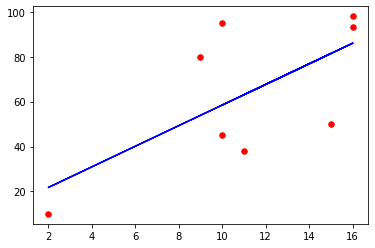

In [ ]:
import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self,datapoints):
    self.X = []
    self.Y = []
    for item in datapoints:
      self.X.append(item[0])
      self.Y.append(item[1])
    self.b1 = 0
    self.b0 = 0
  
  def train(self):
    X_mean = sum(self.X)/len(self.X)
    Y_mean = sum(self.Y)/len(self.Y)

    b1_num = 0
    b1_deno = 0
    for index in range(0,len(self.X)):
      b1_num+=((self.X[index]-X_mean)*(self.Y[index]-Y_mean))
      b1_deno+=((self.X[index]-X_mean)*(self.X[index]-X_mean))
    
    self.b1 = b1_num/b1_deno
    self.b0 = (Y_mean-self.b1*X_mean)
  
  def plot(self):
    data = list(zip(self.X,self.Y))
    plt.scatter(self.X,self.Y,color='red',s=30)
    Y_pred = []
    for x,y in data:
      Y_pred.append(self.b1*x+self.b0)
    plt.plot(self.X,Y_pred,color='blue')
    plt.show()

datapoints = [[10,95],[9,80],[2,10],[15,50],[10,45],[16,98],[11,38],[16,93]]

lr = LinearRegression(datapoints)
lr.train()
lr.plot()

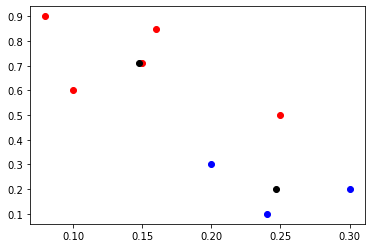

In [ ]:
dataset = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)
]
centers = [
  (0.1,0.6),
  (0.3,0.2)
]

def mean(labels):
  return sum(labels)/len(labels)

def euclidean_dist(point1,point2):
  return pow((pow(point2[1]-point1[1],2) + pow(point2[0]-point1[0],2)),0.5)

def KMeans(dataset,centroids):
  centroids = centroids
  for i in range(0,10):
    centers={}
    for point in dataset:
      min_dist = 1000000
      min_dist_cen = None
      for index in range(0,len(centroids)):
        dist = euclidean_dist(point,centroids[index])
        if dist < min_dist:
          min_dist = dist
          min_dist_cen = index

      if min_dist_cen not in centers:
        centers[min_dist_cen] = [[point[0]],[point[1]]]
      else:
        centers[min_dist_cen][0].append(point[0])
        centers[min_dist_cen][1].append(point[1])

    centroids=[]
    for center in list(centers.keys()):
      centroids.append((mean(centers[center][0]),mean(centers[center][1])))
  
  return centroids,centers

centroids,centers = KMeans(dataset,centers)
plt.scatter(centers[0][0],centers[0][1],color='red')
plt.scatter(centers[1][0],centers[1][1],color='blue')
plt.scatter(centroids[0][0],centroids[0][1],color='black')
plt.scatter(centroids[1][0],centroids[1][1],color='black')
plt.show()

In [ ]:
from collections import Counter
import math

clf_data = [
    ((4,2),1),
    ((2,4),1),
    ((6,4),1),
    ((4,6),1),
    ((6,2),0),
    ((4,4),0)
]

clf_query = [(6,6)]

def mode(labels):
  return Counter(labels).most_common(1)[0][0]

def euclidean_dist(point1,point2):
  return pow((pow(point2[1]-point1[1],2) + pow(point2[0]-point1[0],2)),0.5)

def K_nearest(k):
  distances = []
  for index,point in enumerate(clf_data):
    dist = euclidean_dist(clf_query[0],point[0])
    distances.append((dist,index))
  distances = sorted(distances)
  k_nearest = distances[:k]
  target2weight = {}
  c = 0.0001
  for distance,target in  k_nearest:
    weight = 1/(distance + c)
    if target in target2weight.keys():
      target2weight[target] = target2weight[target] + weight
    else:
      target2weight[target] = weight

  # Prediction is the target value with maximum weighted sum
  prediction = -1
  max_weighted_sum = -1
  for target in target2weight:
    if target2weight[target] > max_weighted_sum:
      prediction = clf_data[target][-1]
      max_weighted_sum = target2weight[target]



  # 7. If regression (choice_fn = mean), return the average of the K labels
  # 8. If classification (choice_fn = mode), return the mode of the K labels
  return k_nearest , prediction
  
print(K_nearest(3)[-1])
#print(mode([clf_data[index][-1] for index in range(len(clf_data))]))

1
